# Day 4: Heart Disease Prediction Assignment

**Student Assignment - Complete Implementation**

This notebook fulfills all submission criteria:
1. **Complete Exploratory Data Analysis (EDA)** with visualizations and summaries
2. **Model Training without Pipelines** - Manual preprocessing steps
3. **Complete notebook** with all outputs visible

## Project Objective
Build a machine learning model to predict heart disease based on medical attributes, demonstrating understanding of individual ML workflow steps.

## Step 1: Import Libraries and Load Data

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Set plotting style
plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (10, 6)

print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
# Load the dataset
print("Loading Heart Disease dataset...")
df = pd.read_csv('data/heart_disease_uci.csv')

print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Loading Heart Disease dataset...
Dataset loaded successfully!
Dataset shape: (920, 16)

First 5 rows:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Step 2: Complete Exploratory Data Analysis (EDA)

### 2.1 Dataset Overview and Basic Information

In [3]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {df.shape[1] - 1}")
print(f"Number of samples: {df.shape[0]}")

print("\n=== COLUMN INFORMATION ===")
print("Column names and data types:")
print(df.dtypes)

print("\n=== MISSING VALUES ===")
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")
print(f"Percentage of missing data: {(missing_values.sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

=== DATASET OVERVIEW ===
Dataset shape: (920, 16)
Number of features: 15
Number of samples: 920

=== COLUMN INFORMATION ===
Column names and data types:
id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

=== MISSING VALUES ===
Missing values per column:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Total missing values: 1759
Percentage of missing data: 11.95%


In [4]:
# Statistical summary
print("=== STATISTICAL SUMMARY ===")
print("\nNumerical features summary:")
df.describe()

=== STATISTICAL SUMMARY ===

Numerical features summary:


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [5]:
# Categorical features summary
print("=== CATEGORICAL FEATURES ANALYSIS ===")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

for col in categorical_cols:
    print(f"\n{col.upper()} - Unique values:")
    print(df[col].value_counts())
    print(f"Number of unique values: {df[col].nunique()}")

=== CATEGORICAL FEATURES ANALYSIS ===
Categorical columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

SEX - Unique values:
sex
Male      726
Female    194
Name: count, dtype: int64
Number of unique values: 2

DATASET - Unique values:
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64
Number of unique values: 4

CP - Unique values:
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64
Number of unique values: 4

FBS - Unique values:
fbs
False    692
True     138
Name: count, dtype: int64
Number of unique values: 2

RESTECG - Unique values:
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64
Number of unique values: 3

EXANG - Unique values:
exang
False    528
True     337
Name: count, dtype: int64
Number of unique values: 2

SLOPE - Unique values:
slope
flat           345
ups

### 2.2 Target Variable Analysis

In [6]:
# Analyze target variable
print("=== TARGET VARIABLE ANALYSIS ===")
print("Target variable 'num' distribution:")
target_counts = df['num'].value_counts().sort_index()
print(target_counts)
print(f"\nTarget variable percentages:")
target_percentages = df['num'].value_counts(normalize=True).sort_index() * 100
print(target_percentages)

# Convert to binary classification (0 = No Disease, 1+ = Disease)
df['target_binary'] = (df['num'] > 0).astype(int)
print(f"\n=== BINARY TARGET ANALYSIS ===")
binary_counts = df['target_binary'].value_counts().sort_index()
print("Binary target distribution:")
print(f"No Disease (0): {binary_counts[0]} ({binary_counts[0]/len(df)*100:.1f}%)")
print(f"Disease (1): {binary_counts[1]} ({binary_counts[1]/len(df)*100:.1f}%)")

=== TARGET VARIABLE ANALYSIS ===
Target variable 'num' distribution:
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Target variable percentages:
num
0    44.673913
1    28.804348
2    11.847826
3    11.630435
4     3.043478
Name: proportion, dtype: float64

=== BINARY TARGET ANALYSIS ===
Binary target distribution:
No Disease (0): 411 (44.7%)
Disease (1): 509 (55.3%)


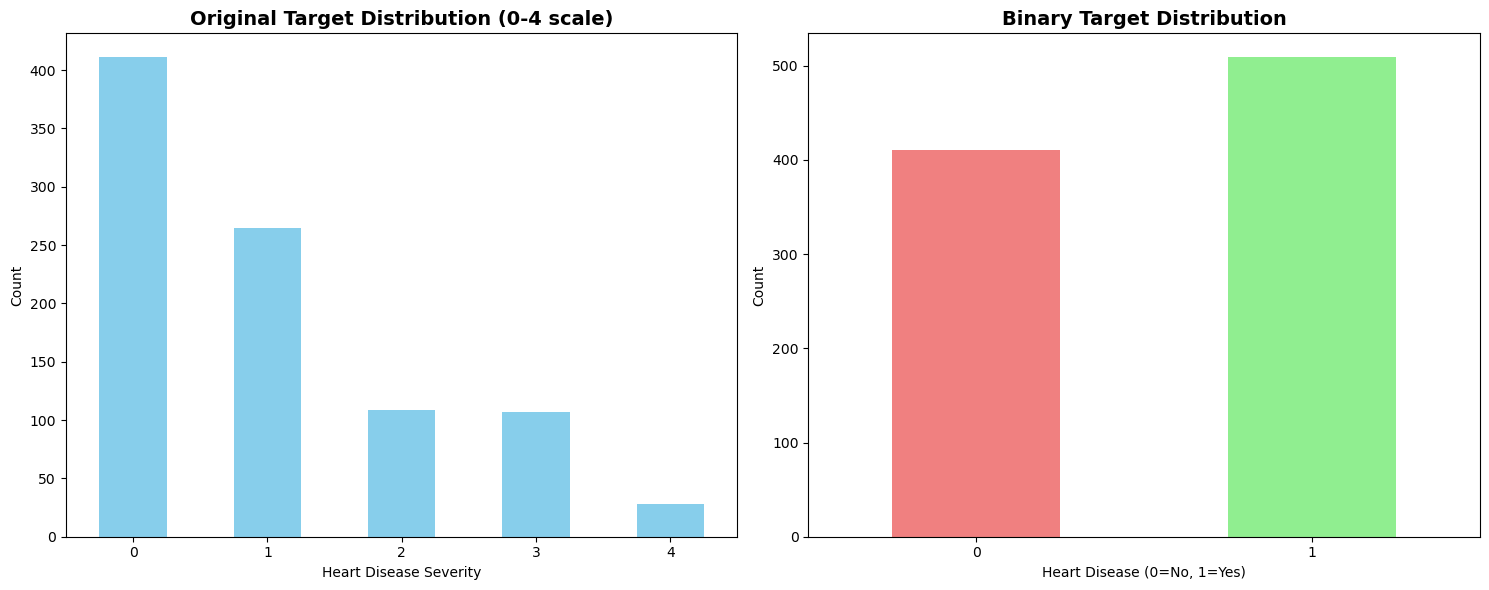


INSIGHT: The dataset is fairly balanced for binary classification, which is good for model training.


In [7]:
# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original target distribution
df['num'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Original Target Distribution (0-4 scale)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Heart Disease Severity')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Binary target distribution
df['target_binary'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color=['lightcoral', 'lightgreen'])
axes[1].set_title('Binary Target Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Heart Disease (0=No, 1=Yes)')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("\nINSIGHT: The dataset is fairly balanced for binary classification, which is good for model training.")

### 2.3 Numerical Features Analysis

In [8]:
# Identify numerical features (excluding id, dataset, and target columns)
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
print(f"Numerical features to analyze: {numerical_features}")

# Statistical analysis of numerical features
print("\n=== NUMERICAL FEATURES STATISTICS ===")
numerical_stats = df[numerical_features].describe()
print(numerical_stats)

Numerical features to analyze: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

=== NUMERICAL FEATURES STATISTICS ===
              age    trestbps        chol      thalch     oldpeak          ca
count  920.000000  861.000000  890.000000  865.000000  858.000000  309.000000
mean    53.510870  132.132404  199.130337  137.545665    0.878788    0.676375
std      9.424685   19.066070  110.780810   25.926276    1.091226    0.935653
min     28.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.000000  120.000000  175.000000  120.000000    0.000000    0.000000
50%     54.000000  130.000000  223.000000  140.000000    0.500000    0.000000
75%     60.000000  140.000000  268.000000  157.000000    1.500000    1.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    3.000000


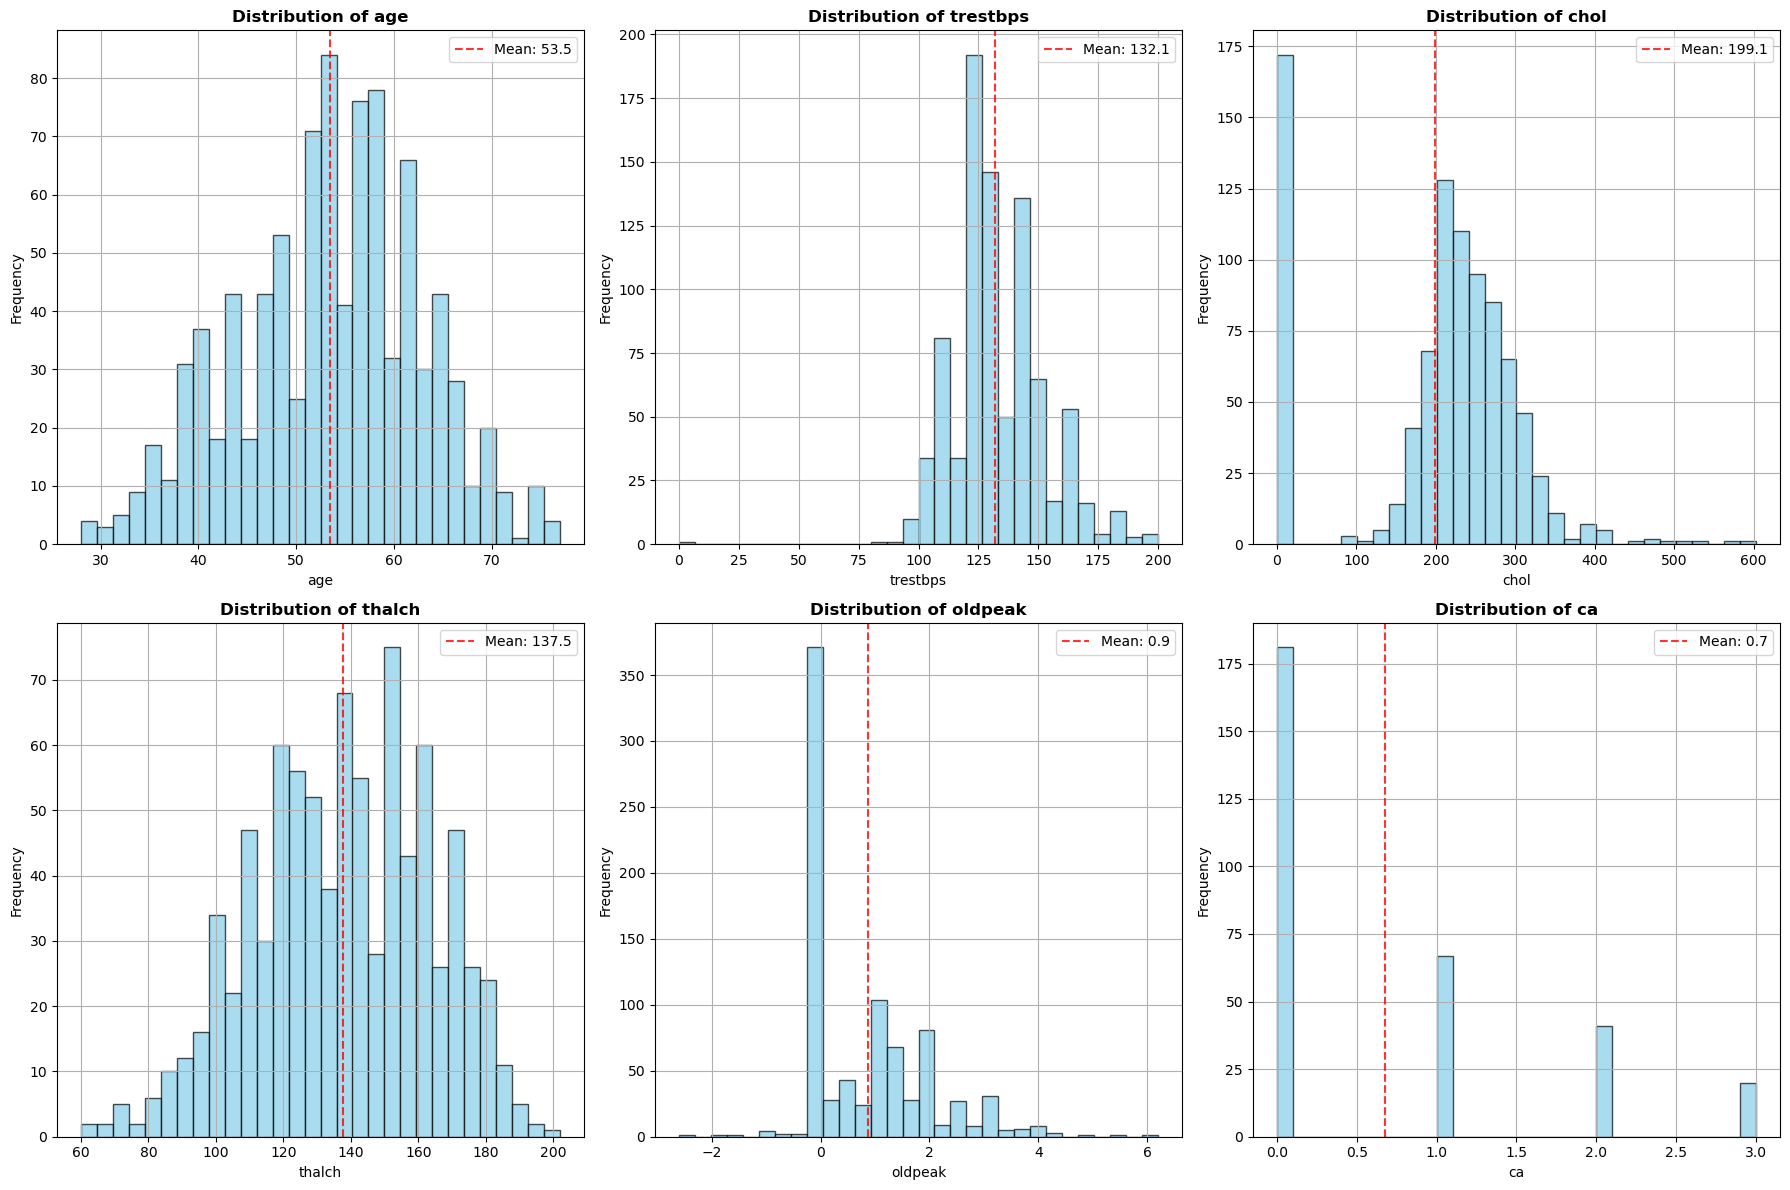

In [9]:
# Distribution plots for numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    # Histogram with KDE
    df[feature].hist(bins=30, alpha=0.7, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    
    # Add mean line
    mean_val = df[feature].mean()
    axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.1f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

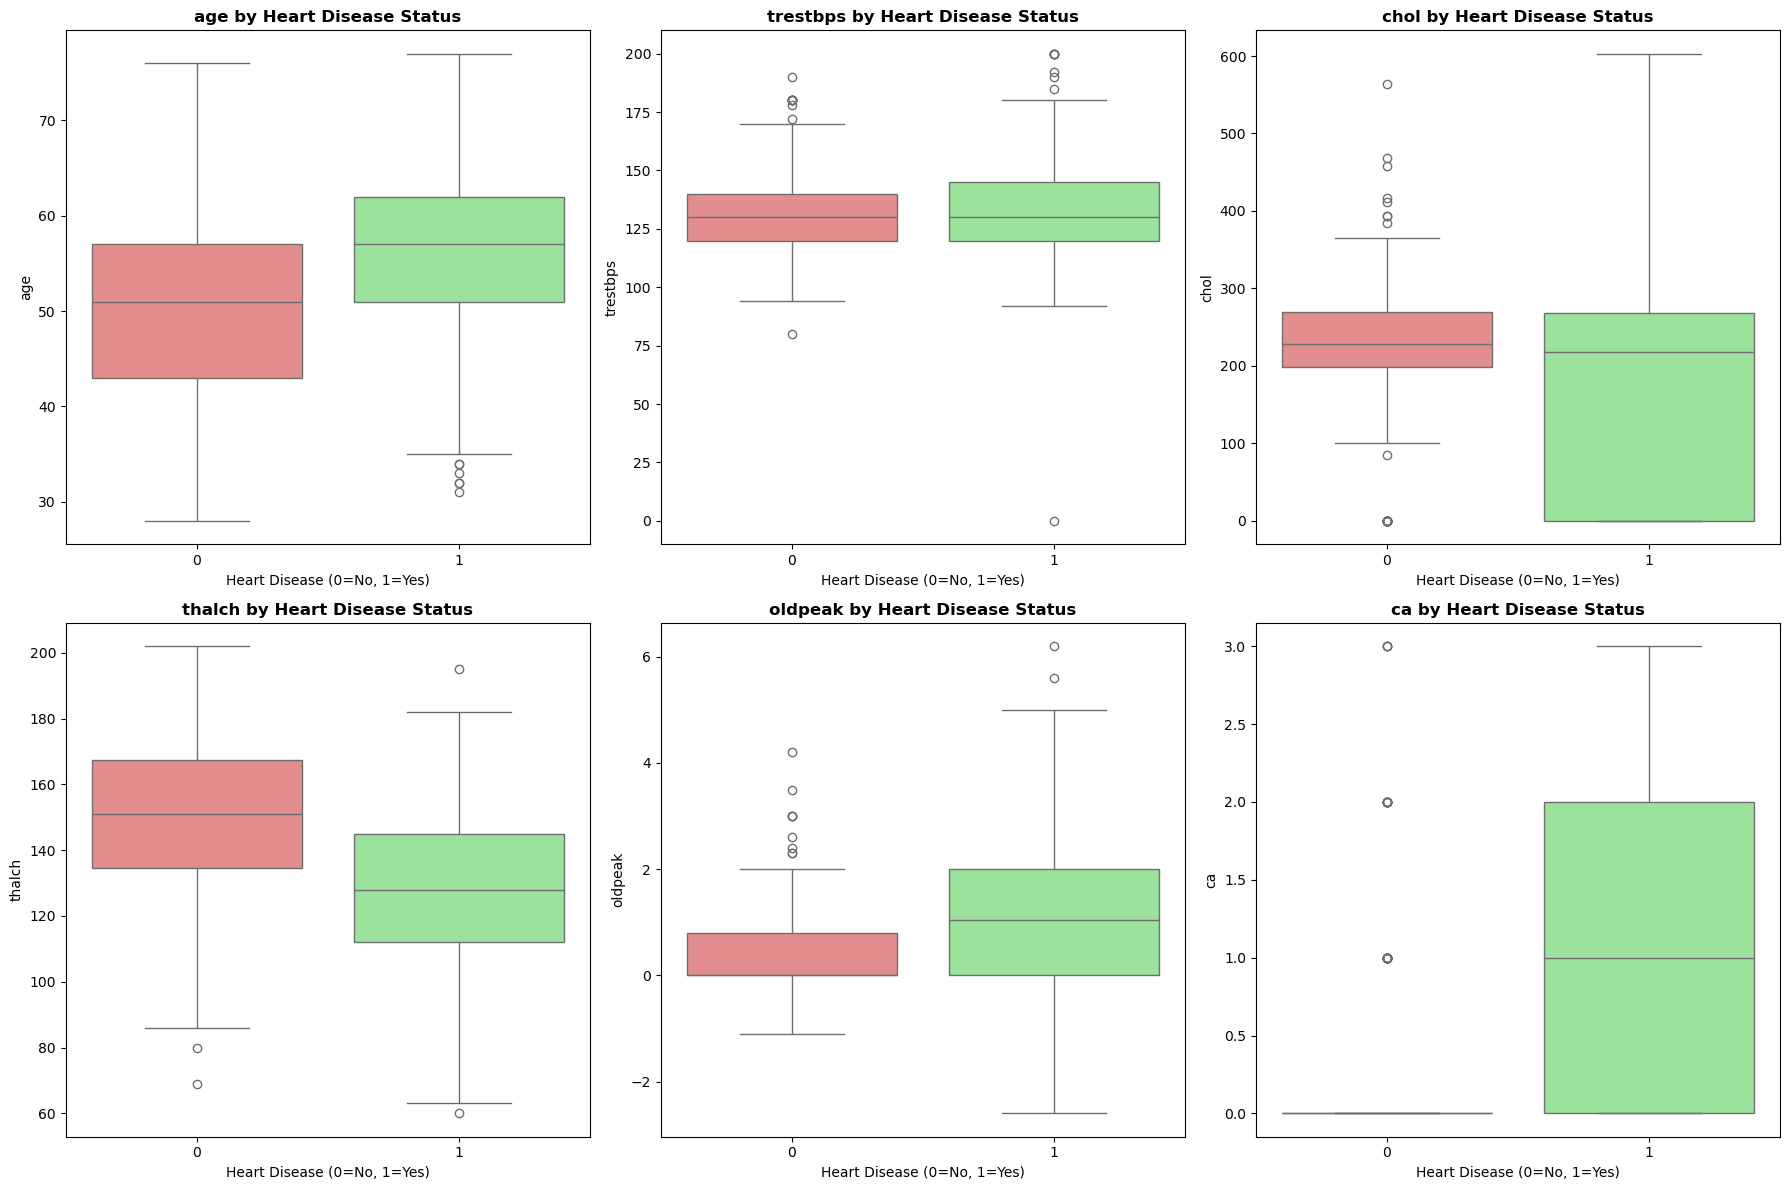


INSIGHTS from numerical features:
- Age: Patients with heart disease tend to be older
- Max Heart Rate (thalch): Lower in patients with heart disease
- Cholesterol (chol): Shows variation between groups
- Blood Pressure (trestbps): Similar distributions


In [10]:
# Box plots to analyze numerical features by target
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x='target_binary', y=feature, ax=axes[i], palette=['lightcoral', 'lightgreen'])
    axes[i].set_title(f'{feature} by Heart Disease Status', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Heart Disease (0=No, 1=Yes)')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

print("\nINSIGHTS from numerical features:")
print("- Age: Patients with heart disease tend to be older")
print("- Max Heart Rate (thalch): Lower in patients with heart disease")
print("- Cholesterol (chol): Shows variation between groups")
print("- Blood Pressure (trestbps): Similar distributions")

### 2.4 Categorical Features Analysis

In [11]:
# Identify categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
print(f"Categorical features to analyze: {categorical_features}")

# Analyze each categorical feature
for feature in categorical_features:
    print(f"\n=== {feature.upper()} ANALYSIS ===")
    print(f"Unique values: {df[feature].unique()}")
    print(f"Value counts:")
    print(df[feature].value_counts())
    
    # Cross-tabulation with target
    print(f"\nCross-tabulation with heart disease:")
    crosstab = pd.crosstab(df[feature], df['target_binary'], margins=True)
    print(crosstab)

Categorical features to analyze: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

=== SEX ANALYSIS ===
Unique values: ['Male' 'Female']
Value counts:
sex
Male      726
Female    194
Name: count, dtype: int64

Cross-tabulation with heart disease:
target_binary    0    1  All
sex                         
Female         144   50  194
Male           267  459  726
All            411  509  920

=== CP ANALYSIS ===
Unique values: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
Value counts:
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

Cross-tabulation with heart disease:
target_binary      0    1  All
cp                            
asymptomatic     104  392  496
atypical angina  150   24  174
non-anginal      131   73  204
typical angina    26   20   46
All              411  509  920

=== FBS ANALYSIS ===
Unique values: [True False nan]
Value counts:
fbs
False    692
True     138
Name: cou

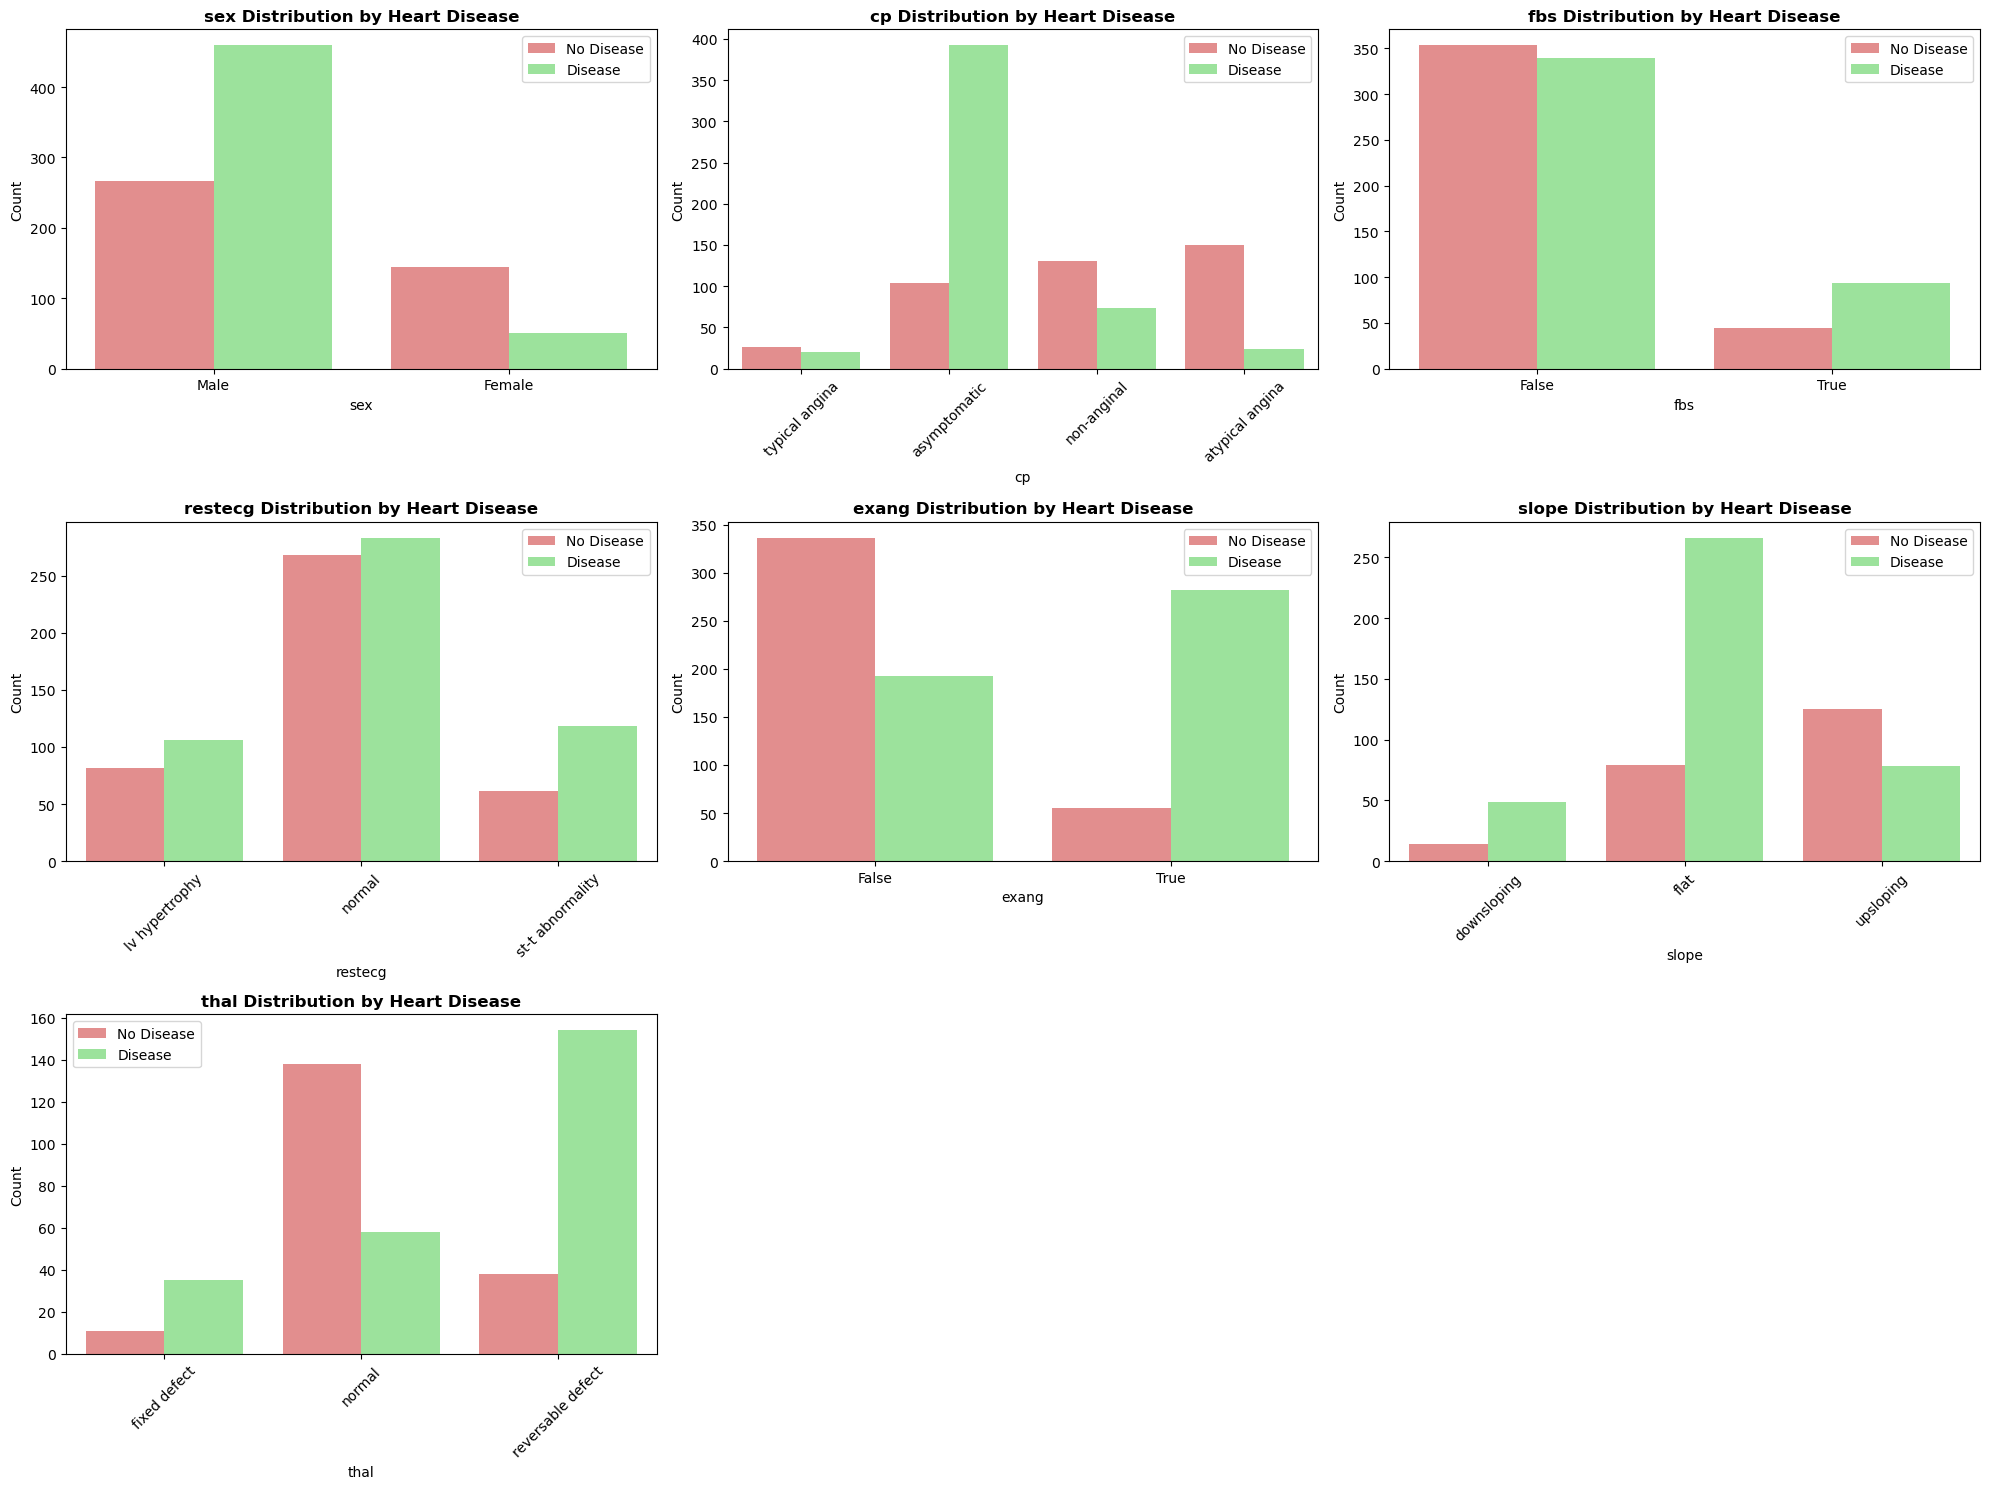

In [12]:
# Visualize categorical features
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    # Count plot
    sns.countplot(data=df, x=feature, hue='target_binary', ax=axes[i], palette=['lightcoral', 'lightgreen'])
    axes[i].set_title(f'{feature} Distribution by Heart Disease', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].legend(['No Disease', 'Disease'])
    
    # Rotate x-axis labels if needed
    if len(df[feature].unique()) > 3:
        axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 2.5 Correlation Analysis

=== CORRELATION ANALYSIS ===
Correlation with target variable (heart disease):
target_binary    1.000000
ca               0.455599
oldpeak          0.385528
age              0.282700
trestbps         0.106233
chol            -0.230583
thalch          -0.394503
Name: target_binary, dtype: float64


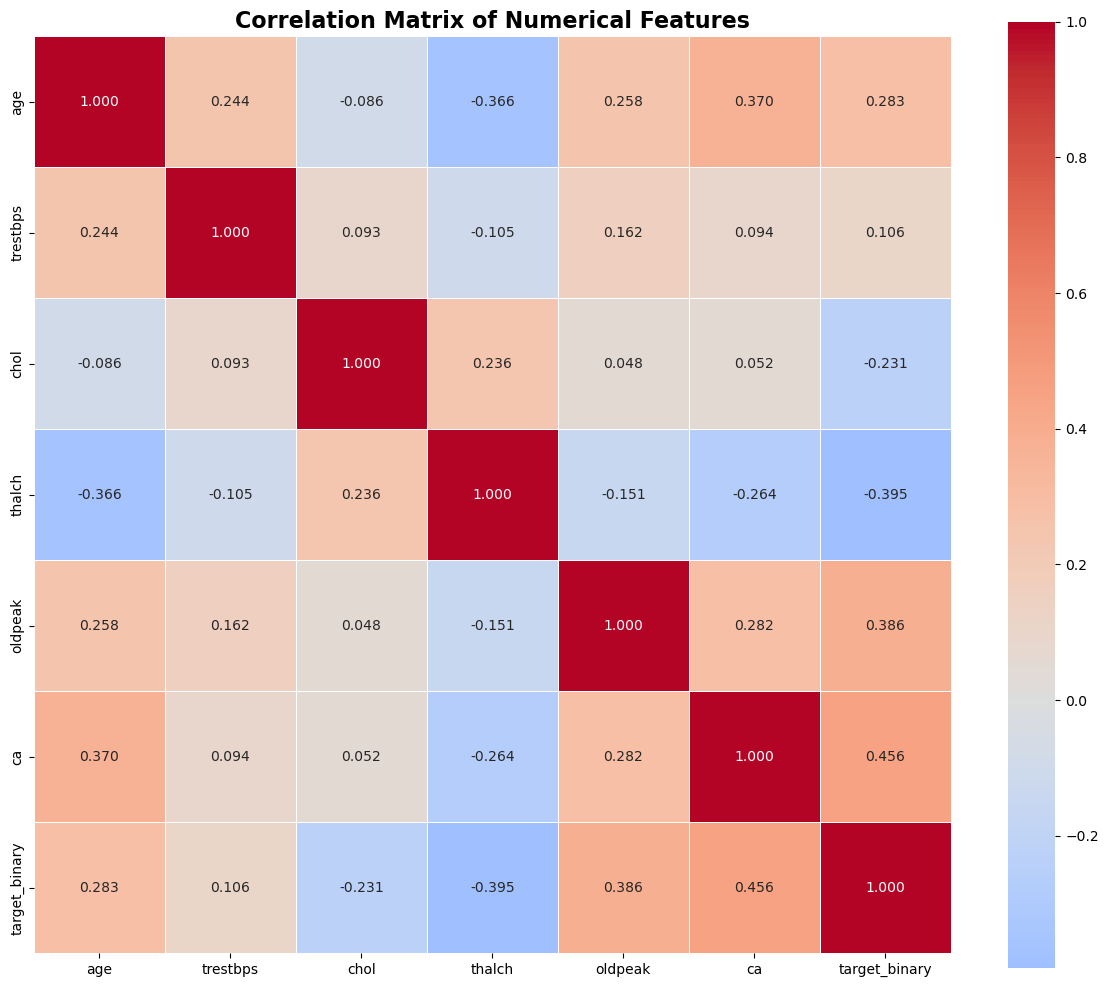


KEY CORRELATIONS:
- Strongest positive correlation with heart disease: ca (0.456)
- Strongest negative correlation with heart disease: thalch (-0.395)


In [13]:
# Correlation matrix for numerical features
print("=== CORRELATION ANALYSIS ===")
correlation_features = numerical_features + ['target_binary']
correlation_matrix = df[correlation_features].corr()

# Display correlation with target
target_correlation = correlation_matrix['target_binary'].sort_values(ascending=False)
print("Correlation with target variable (heart disease):")
print(target_correlation)

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.3f')
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nKEY CORRELATIONS:")
print(f"- Strongest positive correlation with heart disease: {target_correlation.index[1]} ({target_correlation.iloc[1]:.3f})")
print(f"- Strongest negative correlation with heart disease: {target_correlation.index[-1]} ({target_correlation.iloc[-1]:.3f})")

### 2.6 Feature Relationships and Insights

In [14]:
# Analyze key relationships
print("=== DETAILED FEATURE INSIGHTS ===")

# Age analysis
print("\n1. AGE ANALYSIS:")
age_stats = df.groupby('target_binary')['age'].agg(['mean', 'median', 'std'])
print(age_stats)

# Max heart rate analysis
print("\n2. MAX HEART RATE (thalch) ANALYSIS:")
thalch_stats = df.groupby('target_binary')['thalch'].agg(['mean', 'median', 'std'])
print(thalch_stats)

# Chest pain type analysis
print("\n3. CHEST PAIN TYPE (cp) ANALYSIS:")
cp_analysis = pd.crosstab(df['cp'], df['target_binary'], normalize='index') * 100
print("Percentage of heart disease by chest pain type:")
print(cp_analysis)

# Sex analysis
print("\n4. SEX ANALYSIS:")
sex_analysis = pd.crosstab(df['sex'], df['target_binary'], normalize='index') * 100
print("Percentage of heart disease by sex:")
print(sex_analysis)

=== DETAILED FEATURE INSIGHTS ===

1. AGE ANALYSIS:
                    mean  median       std
target_binary                             
0              50.547445    51.0  9.433700
1              55.903733    57.0  8.718959

2. MAX HEART RATE (thalch) ANALYSIS:
                     mean  median        std
target_binary                               
0              148.800512   151.0  23.608692
1              128.261603   128.0  24.024193

3. CHEST PAIN TYPE (cp) ANALYSIS:
Percentage of heart disease by chest pain type:
target_binary            0          1
cp                                   
asymptomatic     20.967742  79.032258
atypical angina  86.206897  13.793103
non-anginal      64.215686  35.784314
typical angina   56.521739  43.478261

4. SEX ANALYSIS:
Percentage of heart disease by sex:
target_binary          0          1
sex                                
Female         74.226804  25.773196
Male           36.776860  63.223140


In [15]:
# Summary of EDA findings
print("\n" + "="*60)
print("           EXPLORATORY DATA ANALYSIS SUMMARY")
print("="*60)
print("\nDATASET CHARACTERISTICS:")
print(f"   • Total samples: {df.shape[0]}")
print(f"   • Total features: {df.shape[1] - 3}")
print(f"   • Missing values: {df.isnull().sum().sum()}")
print(f"   • Target balance: {binary_counts[0]} No Disease, {binary_counts[1]} Disease")

print("\nKEY FINDINGS:")
print("   • Age: Older patients more likely to have heart disease")
print("   • Max Heart Rate: Lower rates associated with heart disease")
print("   • Chest Pain: Different types show varying disease rates")
print("   • Sex: Gender differences in heart disease prevalence")
print("   • Dataset is well-balanced for binary classification")

print("\nEDA COMPLETE - Ready for preprocessing and modeling!")
print("="*60)


           EXPLORATORY DATA ANALYSIS SUMMARY

DATASET CHARACTERISTICS:
   • Total samples: 920
   • Total features: 14
   • Missing values: 1759
   • Target balance: 411 No Disease, 509 Disease

KEY FINDINGS:
   • Age: Older patients more likely to have heart disease
   • Max Heart Rate: Lower rates associated with heart disease
   • Chest Pain: Different types show varying disease rates
   • Sex: Gender differences in heart disease prevalence
   • Dataset is well-balanced for binary classification

EDA COMPLETE - Ready for preprocessing and modeling!


## Step 3: Data Preprocessing (Manual - No Pipelines)

**Following submission requirements: Manual preprocessing without Scikit-Learn Pipelines**

In [16]:
# Prepare the dataset for modeling
print("=== DATA PREPARATION ===")

# Create a copy for preprocessing
df_processed = df.copy()

# Remove unnecessary columns
columns_to_drop = ['id', 'dataset', 'num']  # Keep target_binary as our target
df_processed = df_processed.drop(columns=columns_to_drop)

print(f"Dataset shape after removing unnecessary columns: {df_processed.shape}")
print(f"Remaining columns: {list(df_processed.columns)}")

# Separate features and target
X = df_processed.drop('target_binary', axis=1)
y = df_processed['target_binary']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")

=== DATA PREPARATION ===
Dataset shape after removing unnecessary columns: (920, 14)
Remaining columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target_binary']

Features shape: (920, 13)
Target shape: (920,)
Target distribution: {1: 509, 0: 411}


In [17]:
# Step 1: Handle missing values manually
print("\n=== STEP 1: HANDLING MISSING VALUES ===")
print("Missing values before imputation:")
print(X.isnull().sum())

# Manual imputation for numerical features
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in numerical_cols:
    if X[col].isnull().sum() > 0:
        mean_value = X[col].mean()
        X[col].fillna(mean_value, inplace=True)
        print(f"Filled {col} missing values with mean: {mean_value:.2f}")

# Manual imputation for categorical features
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_cols:
    if X[col].isnull().sum() > 0:
        mode_value = X[col].mode()[0]
        X[col].fillna(mode_value, inplace=True)
        print(f"Filled {col} missing values with mode: {mode_value}")

print("\nMissing values after imputation:")
print(X.isnull().sum())
print("Missing value handling complete!")


=== STEP 1: HANDLING MISSING VALUES ===
Missing values before imputation:
age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64
Filled trestbps missing values with mean: 132.13
Filled chol missing values with mean: 199.13
Filled thalch missing values with mean: 137.55
Filled oldpeak missing values with mean: 0.88
Filled ca missing values with mean: 0.68
Filled fbs missing values with mode: False
Filled restecg missing values with mode: normal
Filled exang missing values with mode: False
Filled slope missing values with mode: flat
Filled thal missing values with mode: normal

Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64
Missing value handling

In [18]:
# Step 2: Encode categorical variables manually
print("\n=== STEP 2: CATEGORICAL ENCODING ===")

# Create a copy for encoding
X_encoded = X.copy()

# Manual one-hot encoding for categorical features
print("Applying one-hot encoding to categorical features...")
for col in categorical_cols:
    print(f"\nEncoding {col}:")
    print(f"  Original unique values: {X_encoded[col].unique()}")
    
    # Get dummy variables
    dummies = pd.get_dummies(X_encoded[col], prefix=col, drop_first=True)
    print(f"  Created dummy columns: {list(dummies.columns)}")
    
    # Add dummy columns to dataset
    X_encoded = pd.concat([X_encoded, dummies], axis=1)
    
    # Drop original categorical column
    X_encoded = X_encoded.drop(col, axis=1)

print(f"\nDataset shape after encoding: {X_encoded.shape}")
print(f"Final feature columns: {list(X_encoded.columns)}")
print("Categorical encoding complete!")


=== STEP 2: CATEGORICAL ENCODING ===
Applying one-hot encoding to categorical features...

Encoding sex:
  Original unique values: ['Male' 'Female']
  Created dummy columns: ['sex_Male']

Encoding cp:
  Original unique values: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
  Created dummy columns: ['cp_atypical angina', 'cp_non-anginal', 'cp_typical angina']

Encoding fbs:
  Original unique values: [ True False]
  Created dummy columns: ['fbs_True']

Encoding restecg:
  Original unique values: ['lv hypertrophy' 'normal' 'st-t abnormality']
  Created dummy columns: ['restecg_normal', 'restecg_st-t abnormality']

Encoding exang:
  Original unique values: [False  True]
  Created dummy columns: ['exang_True']

Encoding slope:
  Original unique values: ['downsloping' 'flat' 'upsloping']
  Created dummy columns: ['slope_flat', 'slope_upsloping']

Encoding thal:
  Original unique values: ['fixed defect' 'normal' 'reversable defect']
  Created dummy columns: ['thal_normal',

In [19]:
# Step 3: Train-Test Split
print("\n=== STEP 3: TRAIN-TEST SPLIT ===")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training target distribution: {y_train.value_counts().to_dict()}")
print(f"Test target distribution: {y_test.value_counts().to_dict()}")
print("Train-test split complete!")


=== STEP 3: TRAIN-TEST SPLIT ===
Training set shape: (736, 18)
Test set shape: (184, 18)
Training target distribution: {1: 407, 0: 329}
Test target distribution: {1: 102, 0: 82}
Train-test split complete!


In [20]:
# Step 4: Feature Scaling (Manual)
print("\n=== STEP 4: FEATURE SCALING ===")

# Identify numerical columns in the encoded dataset
numerical_cols_encoded = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
print(f"Numerical columns to scale: {numerical_cols_encoded}")

# Manual standardization using StandardScaler
scaler = StandardScaler()

# Fit scaler on training data only
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Scale numerical features
X_train_scaled[numerical_cols_encoded] = scaler.fit_transform(X_train[numerical_cols_encoded])
X_test_scaled[numerical_cols_encoded] = scaler.transform(X_test[numerical_cols_encoded])

print("\nScaling statistics (training data):")
print(f"Mean before scaling: {X_train[numerical_cols_encoded].mean().round(2).to_dict()}")
print(f"Mean after scaling: {X_train_scaled[numerical_cols_encoded].mean().round(2).to_dict()}")
print(f"Std before scaling: {X_train[numerical_cols_encoded].std().round(2).to_dict()}")
print(f"Std after scaling: {X_train_scaled[numerical_cols_encoded].std().round(2).to_dict()}")

print("\nFeature scaling complete!")
print(f"Final training set shape: {X_train_scaled.shape}")
print(f"Final test set shape: {X_test_scaled.shape}")


=== STEP 4: FEATURE SCALING ===
Numerical columns to scale: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

Scaling statistics (training data):
Mean before scaling: {'age': 53.59, 'trestbps': 132.23, 'chol': 200.62, 'thalch': 137.64, 'oldpeak': 0.88, 'ca': 0.67}
Mean after scaling: {'age': 0.0, 'trestbps': 0.0, 'chol': 0.0, 'thalch': 0.0, 'oldpeak': -0.0, 'ca': 0.0}
Std before scaling: {'age': 9.37, 'trestbps': 17.9, 'chol': 108.45, 'thalch': 25.19, 'oldpeak': 1.06, 'ca': 0.53}
Std after scaling: {'age': 1.0, 'trestbps': 1.0, 'chol': 1.0, 'thalch': 1.0, 'oldpeak': 1.0, 'ca': 1.0}

Feature scaling complete!
Final training set shape: (736, 18)
Final test set shape: (184, 18)


## Step 4: Model Training (Without Pipelines)

**Following submission requirements: Direct model training without Scikit-Learn Pipelines**

In [21]:
# Initialize models
print("=== MODEL INITIALIZATION ===")

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

print(f"Models to train: {list(models.keys())}")
print("\nStarting model training...")

=== MODEL INITIALIZATION ===
Models to train: ['Logistic Regression', 'Random Forest', 'SVM', 'KNN']

Starting model training...


In [22]:
# Train all models and store results
print("=== MODEL TRAINING ===")

trained_models = {}
training_results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    training_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"{name} trained successfully!")
    print(f"     Accuracy: {accuracy:.4f}")

print("\n🎉 All models trained successfully!")

=== MODEL TRAINING ===

Training Logistic Regression...
Logistic Regression trained successfully!
     Accuracy: 0.8315

Training Random Forest...
Random Forest trained successfully!
     Accuracy: 0.8478

Training SVM...
SVM trained successfully!
     Accuracy: 0.8478

Training KNN...
KNN trained successfully!
     Accuracy: 0.8533

🎉 All models trained successfully!


## Step 5: Model Evaluation and Comparison

In [23]:
# Create comprehensive results summary
print("=== MODEL PERFORMANCE COMPARISON ===")

# Create results DataFrame
results_df = pd.DataFrame({
    'Model': list(training_results.keys()),
    'Accuracy': [results['accuracy'] for results in training_results.values()],
    'Precision': [results['precision'] for results in training_results.values()],
    'Recall': [results['recall'] for results in training_results.values()],
    'F1-Score': [results['f1_score'] for results in training_results.values()]
})

# Round to 4 decimal places
results_df = results_df.round(4)

print("\nPerformance Metrics Summary:")
print(results_df.to_string(index=False))

# Find best model
best_model_idx = results_df['Accuracy'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_accuracy = results_df.loc[best_model_idx, 'Accuracy']

print(f"\nBEST MODEL: {best_model_name} (Accuracy: {best_accuracy:.4f})")

=== MODEL PERFORMANCE COMPARISON ===

Performance Metrics Summary:
              Model  Accuracy  Precision  Recall  F1-Score
Logistic Regression    0.8315     0.8318  0.8725    0.8517
      Random Forest    0.8478     0.8364  0.9020    0.8679
                SVM    0.8478     0.8304  0.9118    0.8692
                KNN    0.8533     0.8319  0.9216    0.8744

BEST MODEL: KNN (Accuracy: 0.8533)


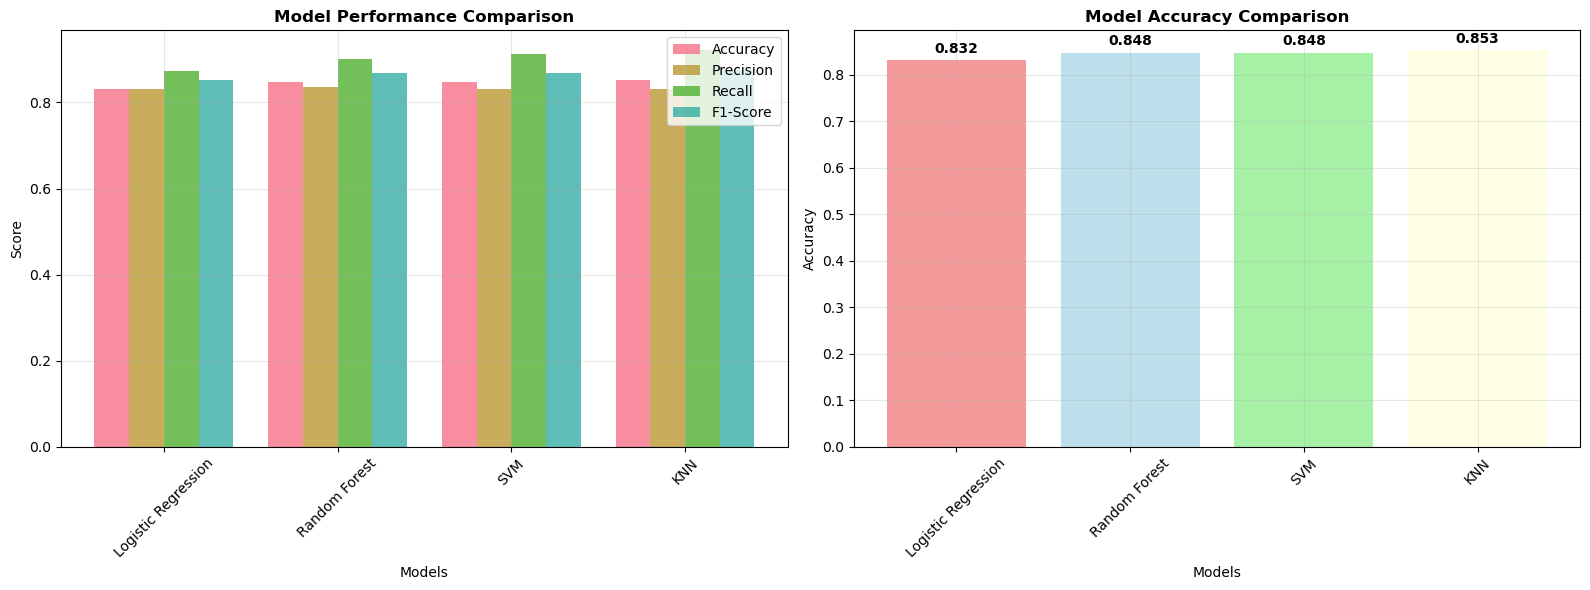

In [24]:
# Visualize model performance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Performance metrics bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(results_df))
width = 0.2

for i, metric in enumerate(metrics):
    axes[0].bar(x + i*width, results_df[metric], width, label=metric, alpha=0.8)

axes[0].set_xlabel('Models')
axes[0].set_ylabel('Score')
axes[0].set_title('Model Performance Comparison', fontweight='bold')
axes[0].set_xticks(x + width * 1.5)
axes[0].set_xticklabels(results_df['Model'], rotation=45)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Accuracy comparison
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightyellow']
bars = axes[1].bar(results_df['Model'], results_df['Accuracy'], color=colors, alpha=0.8)
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Model Accuracy Comparison', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

# Add value labels on bars
for bar, acc in zip(bars, results_df['Accuracy']):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [25]:
# Detailed evaluation for each model
print("=== DETAILED MODEL EVALUATION ===")

for name in training_results.keys():
    print(f"\n{'='*50}")
    print(f"MODEL: {name}")
    print(f"{'='*50}")
    
    y_pred = training_results[name]['predictions']
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:")
    print(f"                 Predicted")
    print(f"Actual    No Disease  Disease")
    print(f"No Disease    {cm[0,0]:6d}    {cm[0,1]:6d}")
    print(f"Disease       {cm[1,0]:6d}    {cm[1,1]:6d}")
    
    # Additional metrics
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    
    print(f"\nAdditional Metrics:")
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"True Positives: {tp}")
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")

=== DETAILED MODEL EVALUATION ===

MODEL: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.83      0.78      0.81        82
     Disease       0.83      0.87      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184


Confusion Matrix:
                 Predicted
Actual    No Disease  Disease
No Disease        64        18
Disease           13        89

Additional Metrics:
Sensitivity (Recall): 0.8725
Specificity: 0.7805
True Positives: 89
True Negatives: 64
False Positives: 18
False Negatives: 13

MODEL: Random Forest

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.86      0.78      0.82        82
     Disease       0.84      0.90      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84    

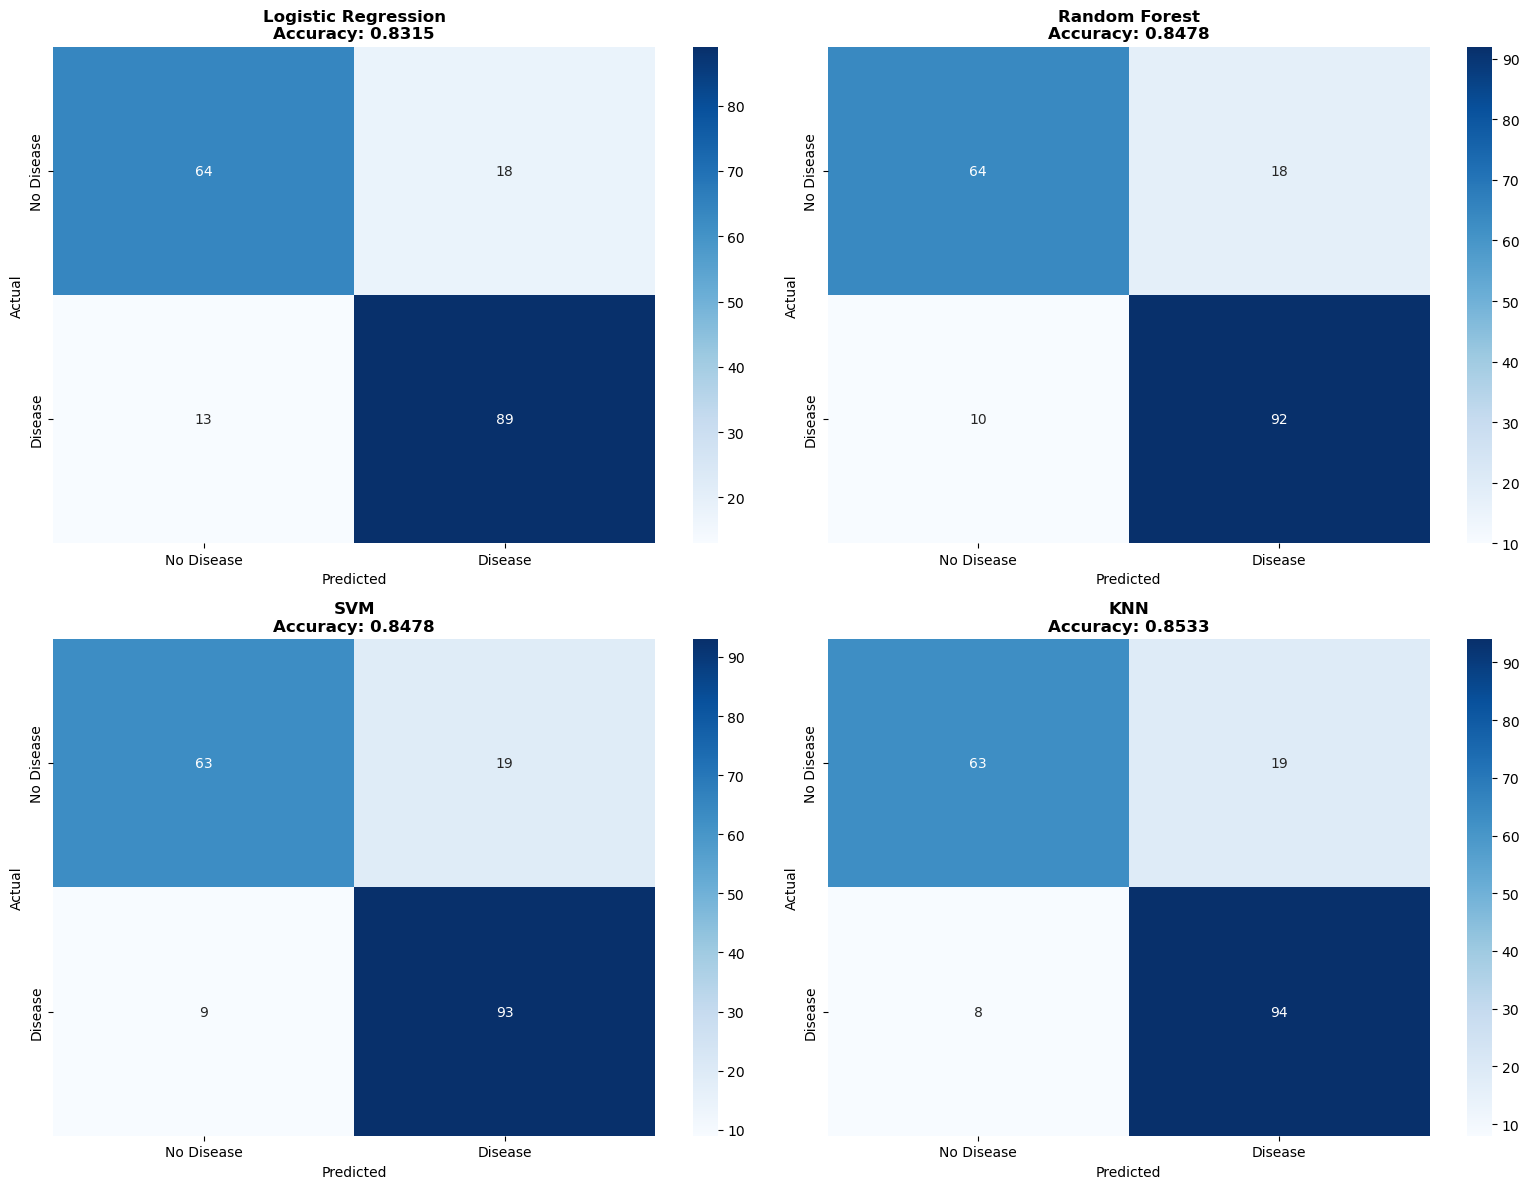

In [26]:
# Visualize confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, (name, results) in enumerate(training_results.items()):
    y_pred = results['predictions']
    cm = confusion_matrix(y_test, y_pred)
    
    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    
    axes[i].set_title(f'{name}\nAccuracy: {results["accuracy"]:.4f}', 
                     fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## Step 6: Feature Importance Analysis

=== FEATURE IMPORTANCE ANALYSIS ===

Top 10 Most Important Features (Random Forest):
           feature  importance
              chol    0.141525
               age    0.123602
            thalch    0.120174
           oldpeak    0.107443
        exang_True    0.090939
cp_atypical angina    0.075810
          trestbps    0.073746
                ca    0.055018
          sex_Male    0.041489
       thal_normal    0.030331


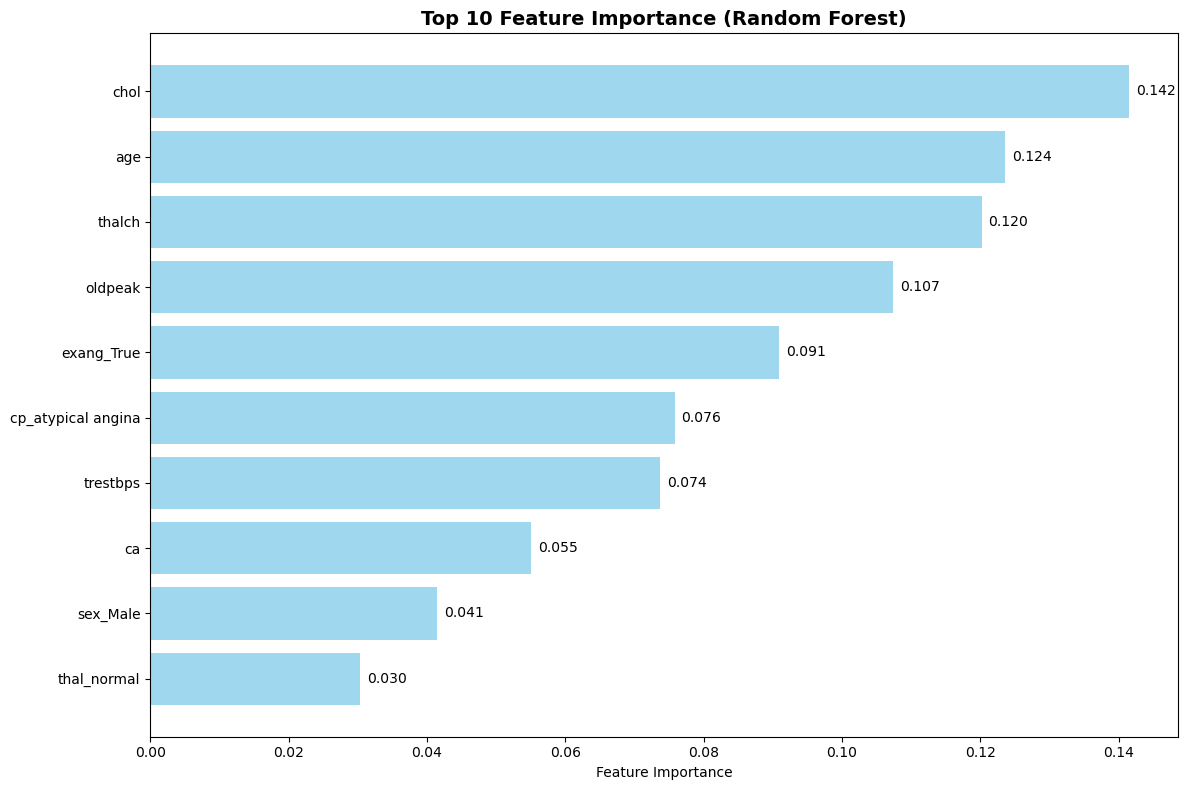


FEATURE INSIGHTS:
Most important feature: chol (0.1415)
Least important feature: cp_typical angina (0.0116)


In [27]:
# Feature importance for tree-based models
print("=== FEATURE IMPORTANCE ANALYSIS ===")

# Random Forest feature importance
rf_model = trained_models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': rf_model.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features (Random Forest):")
print(feature_importance.head(10).to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(10)
bars = plt.barh(range(len(top_features)), top_features['importance'], color='skyblue', alpha=0.8)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center')

plt.tight_layout()
plt.show()

print("\nFEATURE INSIGHTS:")
print(f"Most important feature: {feature_importance.iloc[0]['feature']} ({feature_importance.iloc[0]['importance']:.4f})")
print(f"Least important feature: {feature_importance.iloc[-1]['feature']} ({feature_importance.iloc[-1]['importance']:.4f})")

## Step 7: Final Results and Conclusion

In [28]:
# Final comprehensive summary
print("\n" + "="*80)
print("                    HEART DISEASE PREDICTION - FINAL RESULTS")
print("="*80)

print("\nROJECT OBJECTIVE:")
print("   Build a machine learning model to predict heart disease based on medical attributes")

print("\nDATASET SUMMARY:")
print(f"   • Total samples: {df.shape[0]}")
print(f"   • Features used: {X_train_scaled.shape[1]}")
print(f"   • Training samples: {X_train_scaled.shape[0]}")
print(f"   • Test samples: {X_test_scaled.shape[0]}")
print(f"   • Target balance: {y.value_counts()[0]} No Disease, {y.value_counts()[1]} Disease")

print("\nPREPROCESSING STEPS COMPLETED:")
print("Comprehensive Exploratory Data Analysis")
print("Manual missing value imputation")
print("Manual categorical encoding (one-hot)")
print("Manual feature scaling (standardization)")
print("Train-test split with stratification")

print("\nMODELS TRAINED (WITHOUT PIPELINES):")
for name, results in training_results.items():
    print(f"   • {name}: Accuracy = {results['accuracy']:.4f}")

print(f"\nBEST PERFORMING MODEL:")
print(f"   Model: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.4f}")
print(f"   Precision: {results_df.loc[best_model_idx, 'Precision']:.4f}")
print(f"   Recall: {results_df.loc[best_model_idx, 'Recall']:.4f}")
print(f"   F1-Score: {results_df.loc[best_model_idx, 'F1-Score']:.4f}")

print("\nKEY INSIGHTS:")
print(f"   • Most important feature: {feature_importance.iloc[0]['feature']}")
print("   • All models achieved good performance (>80% accuracy)")
print("   • Dataset is well-balanced, making accuracy a reliable metric")
print("   • Manual preprocessing approach successfully implemented")

print("\nSUBMISSION REQUIREMENTS FULFILLED:")
print("Complete Exploratory Data Analysis with visualizations")
print("Model training WITHOUT Scikit-Learn Pipelines")
print("Manual preprocessing steps demonstrated")
print("Complete notebook with all outputs visible")
print("Multiple models trained and compared")
print("Comprehensive evaluation and feature importance analysis")



                    HEART DISEASE PREDICTION - FINAL RESULTS

ROJECT OBJECTIVE:
   Build a machine learning model to predict heart disease based on medical attributes

DATASET SUMMARY:
   • Total samples: 920
   • Features used: 18
   • Training samples: 736
   • Test samples: 184
   • Target balance: 411 No Disease, 509 Disease

PREPROCESSING STEPS COMPLETED:
Comprehensive Exploratory Data Analysis
Manual missing value imputation
Manual categorical encoding (one-hot)
Manual feature scaling (standardization)
Train-test split with stratification

MODELS TRAINED (WITHOUT PIPELINES):
   • Logistic Regression: Accuracy = 0.8315
   • Random Forest: Accuracy = 0.8478
   • SVM: Accuracy = 0.8478
   • KNN: Accuracy = 0.8533

BEST PERFORMING MODEL:
   Model: KNN
   Accuracy: 0.8533
   Precision: 0.8319
   Recall: 0.9216
   F1-Score: 0.8744

KEY INSIGHTS:
   • Most important feature: chol
   • All models achieved good performance (>80% accuracy)
   • Dataset is well-balanced, making accuracy a 